training data points: 1212
validation data points: 135
testing data points: 450
k=9, accuracy=99.26%
i think tha digit is : 7


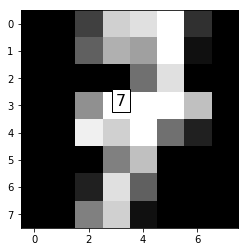

i think tha digit is : 1


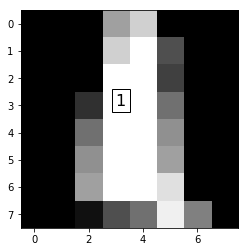

i think tha digit is : 0


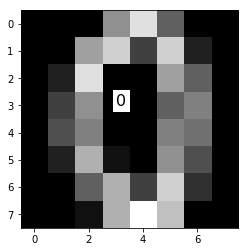

i think tha digit is : 7


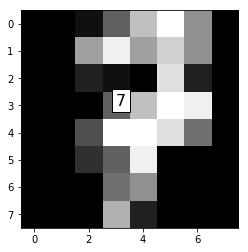

i think tha digit is : 6


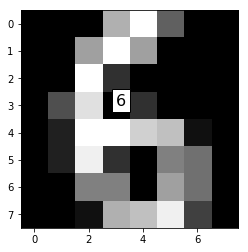

In [61]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
#import imutils
import cv2
import matplotlib.pyplot as plt

# load the MNIST digits dataset
mnist = datasets.load_digits()

# take the MNIST data and construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
mnist.target, test_size=0.25, random_state=42)

# now, let's take 10% of the training data and use that for validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=84)

# show the sizes of each data split
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

# train the k-Nearest Neighbor classifier with the current value of `k`
model = KNeighborsClassifier(n_neighbors=9)
model.fit(trainData, trainLabels)
# evaluate the model and update the accuracies list
score = model.score(valData, valLabels)
print("k=%d, accuracy=%.2f%%" % (9, score * 100))

# loop over a few random digits
for i in np.random.randint(0, high=len(testLabels), size=(5,)):
         # grab the image and classify it
         image = testData[i]
         prediction = model.predict([image])[0]
         # convert the image for a 64-dim array to an 8 x 8 image compatible with OpenCV
         # show the prediction
         
         imgdata = np.array(image, dtype='float')
         pixels = imgdata.reshape((8,8))
         plt.imshow(pixels,cmap='gray')
         plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
         print("i think tha digit is : {}".format(prediction))
         #cv2.imshow("image", image)
         plt.show()
         cv2.waitKey(0)

In [127]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random

# load the MNIST digits dataset
mnist = datasets.load_digits()

class Individual(object):
    def __init__(self, numbers, mutate_prob=0.01):
        if numbers is None:
            self.columns = [np.random.randint(8)]
        else:
            self.columns = numbers
            if mutate_prob > float(np.random.rand()):
                # Number of columns
                mutate_index = np.random.randint(8 - len(numbers))
                # Make list of unique columns
                data = list(range(0,8))
                data = [elem for elem in data if elem not in self.columns]
                random.shuffle(data)
                self.columns.extend(data[0:mutate_index])

    def fitness(self):
        """
            Returns fitness of individual
            Fitness is the accuracy form the classifier
        """
        # take the MNIST data and construct the training and testing split, using 75% of the
        # data for training and 25% for testing
        (trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
        mnist.target, test_size=0.25, random_state=42)
        
        for _, val in enumerate(self.columns):
            for j, _ in enumerate(testData): 
                for k in range(val, 64, 8):
                    testData[j][k] = 0
        # evaluate the model and update the accuracies list
        score = model.score(testData, testLabels)
        #print("columns= ", self.columns, " accuracy= ", (score * 100))
        #imgdata = np.array(testData[0], dtype='float')
        #pixels = imgdata.reshape((8,8))
        #plt.imshow(pixels,cmap='gray')
        #plt.show()
        return 1/(score*len(self.columns))

In [128]:
class Population(object):

    def __init__(self, pop_size=10, mutate_prob=0.01, retain=0.2, random_retain=0.03):
        """
            Args
                pop_size: size of population
                fitness_goal: goal that population will be graded against
        """
        self.pop_size = pop_size
        self.mutate_prob = mutate_prob
        self.retain = retain
        self.random_retain = random_retain
        self.fitness_history = []
        self.parents = []
        self.done = False

        # Create individuals
        self.individuals = []
        for x in range(pop_size):
            self.individuals.append(Individual(numbers=None, mutate_prob=self.mutate_prob))

    def grade(self, generation=None):
        """
            Grade the generation by getting the average fitness of its individuals
        """
        fitness_sum = 0
        for x in self.individuals:
            fitness_sum += x.fitness()

        pop_fitness = fitness_sum / self.pop_size
        self.fitness_history.append(pop_fitness)

        # Set Done flag if we hit target
        if int(round(pop_fitness)) == 0:
            self.done = True

        if generation is not None:
            print("Episode",generation,"Population fitness:", pop_fitness)

    def select_parents(self):
        """
            Select the fittest individuals to be the parents of next generation (lower fitness it better in this case)
            Also select a some random non-fittest individuals to help get us out of local maximums
        """
        # Sort individuals by fitness (we use reversed because in this case lower fintess is better)
        self.individuals = list(reversed(sorted(self.individuals, key=lambda x: x.fitness(), reverse=True)))
        # Keep the fittest as parents for next gen
        retain_length = self.retain * len(self.individuals)
        self.parents = self.individuals[:int(retain_length)]

        # Randomly select some from unfittest and add to parents array
        unfittest = self.individuals[int(retain_length):]
        for unfit in unfittest:
            if self.random_retain > np.random.rand():
                self.parents.append(unfit)

    def breed(self):
        """
            Crossover the parents to generate children and new generation of individuals
        """
        target_children_size = self.pop_size - len(self.parents)
        children = []
        if len(self.parents) > 0:
            while len(children) < target_children_size:
                father = random.choice(self.parents)
                mother = random.choice(self.parents)
                if father != mother:
                    child_numbers = [ random.choice(pixel_pair) for pixel_pair in zip(father.columns, mother.columns)]
                    child = Individual(child_numbers)
                    children.append(child)
            self.individuals = self.parents + children

    def evolve(self):
        # 1. Select fittest
        self.select_parents()
        # 2. Create children and new generation
        self.breed()
        # 3. Reset parents and children
        self.parents = []
        self.children = []

Episode 0 Population fitness: 1.119899138056029
Episode 1 Population fitness: 1.0351734429029171
Episode 2 Population fitness: 1.0119931607230088
Episode 3 Population fitness: 1.0112359550561794
Episode 4 Population fitness: 1.0033019957850788
Episode 5 Population fitness: 0.9909735386370123
Episode 6 Population fitness: 0.9692373802197656
Episode 7 Population fitness: 0.8650773520371021
Episode 8 Population fitness: 0.42040545110100214
Finished at generation: 8 , Population fitness: 0.42040545110100214
[7, 0, 0]
Showing fitness history graph


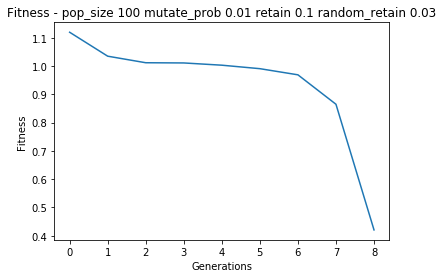

In [131]:
if __name__ == "__main__":
    pop_size = 100
    mutate_prob = 0.01
    retain = 0.1
    random_retain = 0.03

    pop = Population(pop_size=pop_size, mutate_prob=mutate_prob, retain=retain, random_retain=random_retain)

    SHOW_PLOT = True
    GENERATIONS = 5000
    for x in range(GENERATIONS):
        pop.grade(generation=x)
        pop.evolve()

        if pop.done:
            print("Finished at generation:", x, ", Population fitness:", pop.fitness_history[-1])
            print(pop.individuals[-1].columns)
            break

    # Plot fitness history
    if SHOW_PLOT:
        print("Showing fitness history graph")
        plt.plot(np.arange(len(pop.fitness_history)), pop.fitness_history)
        plt.ylabel('Fitness')
        plt.xlabel('Generations')
        plt.title('Fitness - pop_size {} mutate_prob {} retain {} random_retain {}'.format(pop_size, mutate_prob, retain, random_retain))
        plt.show()

In [4]:
data_item = ['map', 'compass', 'water', 'sandwich', 'glucose', 'tin', 'banana',
             'apple', 'cheese', 'beer', 'suntan', 'camera', 'T', 'trousers',
             'umbrella', 'w t', 'w o', 'note-case', 'sunglasses', 'towel',
             'socks', 'book']
data_weight = [9, 13, 153, 50, 15, 68, 27, 39, 23, 52, 11, 32, 24, 48, 73, 42,
               43, 22, 7, 18, 4, 30]
data_value = [150, 35, 200, 160, 60, 45, 60, 40, 30, 10, 70, 30, 15, 10, 40,
              70, 75, 80, 20, 12, 50, 10]
data_sorted = sorted(zip(data_item, data_weight, data_value), key=lambda ivw: ivw[1]//ivw[2], reverse=True)

max_weight = 400


class State(object):
    def __init__(self, level, benefit, weight, token):
        # token = list marking if a task is token. ex. [1, 0, 0] means
        # item0 token, item1 non-token, item2 non-token
        # available = list marking all tasks available, i.e. not explored yet
        self.level = level
        self.benefit = benefit
        self.weight = weight
        self.token = token
        self.ub = State.upperbound(self.token[:self.level]+[1]*(len(data_sorted)-level))

    @staticmethod
    def upperbound(available):  # define upperbound using fractional knaksack
        upperbound = 0  # initial upperbound
        # accumulated weight used to stop the upperbound summation
        remaining = max_weight
        for avail, (_, wei, val) in zip(available, data_sorted):
            wei2 =  wei * avail  # i could not find a better name
            if wei2 <= remaining:
                remaining -= wei2
                upperbound += val * avail
            else:
                upperbound += val * remaining / wei2
                break
        return upperbound

    def develop(self):
        level = self.level + 1
        _, weight, value = data_sorted[self.level]
        left_weight = self.weight + weight
        if left_weight <= max_weight:  # if not overweighted, give left child
            left_benefit = self.benefit + value
            left_token = self.token[:self.level]+[1]+self.token[level:]
            left_child = State(level, left_benefit, left_weight, left_token)
        else:
            left_child = None
        # anyway, give right child
        right_child = State(level, self.benefit, self.weight, self.token)
        return ([] if left_child is None else [left_child]) + [right_child]


Root = State(0, 0, 0, [0] * len(data_sorted))  # start with nothing
waiting_States = []  # list of States waiting to be explored
current_state = Root
while current_state.level < len(data_sorted):
    waiting_States.extend(current_state.develop())
    # sort the waiting list based on their upperbound
    waiting_States.sort(key=lambda x: x.ub)
    # explore the one with largest upperbound
    current_state = waiting_States.pop()
best_item = [item for tok, (item, _, _)
             in zip(current_state.token, data_sorted) if tok == 1]

print("Total weight: ", current_state.weight)
print("Total Value: ", current_state.benefit)
print("Items:", best_item)

Total weight:  396
Total Value:  1030
Items: ['map', 'compass', 'water', 'sandwich', 'glucose', 'banana', 'suntan', 'w t', 'w o', 'note-case', 'sunglasses', 'socks']


In [59]:
def update_bound(columns):
    (trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
    mnist.target, test_size=0.25, random_state=42)

    for _, val in enumerate(columns):
        for j, _ in enumerate(testData): 
            for k in range(val, 64, 8):
                testData[j][k] = 0
    score = model.score(testData, testLabels)
    score = score*len(columns)
    return score

def rec(le, cols, cont, GLO_BOUND, explored):
    end = False
    while end is False:
        catch = 0
        # Update the score for each node
        for i, val in enumerate(cols):
            cols[i][1] = update_bound(val[0])
            # Check wrt to global bound
            if cols[i][1] >= GLO_BOUND:
                catch = 1
                # save whether to continue branch
                cont[i] = 1
        for i, val in enumerate(cont):
            if val == 1:
                explored.append(i)
                le -= 1
                cols = [[[i, 0], 0], [[i, 1], 0], [[i, 2], 0], [[i, 3], 0], [[i, 4], 0], [[i, 5], 0], [[i, 6], 0], [[i, 7], 0]]
                cont = [0, 0, 0, 0, 0, 0, 0, 0]
                rec(le, cols, cont, GLO_BOUND, explored)
     # Make next set of columns
        if catch == 0:
            end = True
        
level = 1
cols = [[[0], 0], [[1], 0], [[2], 0], [[3], 0], [[4], 0], [[5], 0], [[6], 0], [[7], 0]]
cont = [0, 0, 0, 0, 0, 0, 0, 0]
GLO_BOUND = 0.90
GLO_RCOLUMNS = []
explored = []
le = 8

rec(le, cols, cont, GLO_BOUND, explored)

[1, 1, 0, 1, 0, 0, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]


KeyboardInterrupt: 